# Dimensionality Reduction in Linear Regressions
Create a new partial least square regressions with different numbers of components, then see how those changes affect the ability of your models to reproduce the predicted Y values as well as the regular linear regression. Typically, you would choose your components based on the number that gives the most consistent performance between training and test datasets.

In [0]:
import math
import warnings

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression

%matplotlib inline
sns.set_style('white')

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

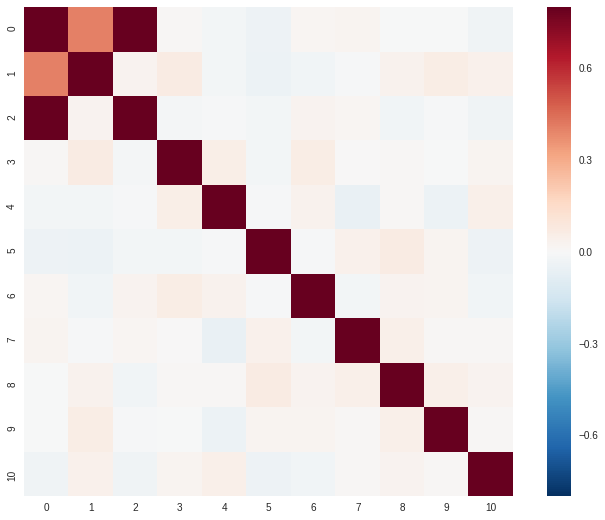

In [27]:
# Number of datapoints in outcome.
n = 1000

# Number of features.
p = 10

# Create random normally distributed data for parameters.
X = np.random.normal(size=n * p).reshape((n, p))

# Create normally distributed outcome related to parameters but with noise.
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5



# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

R-squared regression: 0.8448281005048088
R-squared PLSR: 0.8448280259912645


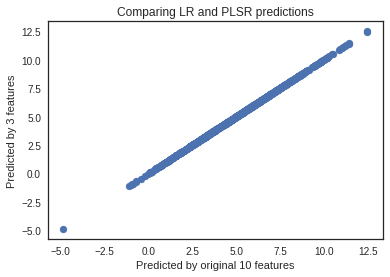

In [28]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

Lowering the amount of features decreases the R-squared score.

In [29]:
pls2 = PLSRegression(n_components = 5)
pls2.fit(X,y)
Y_pls2_pred = pls2.predict(X)
print('R-squared regression, where n = 5:', pls2.score(X, y))

R-squared regression, where n = 5: 0.8448281005028726


In [30]:
pls3 = PLSRegression(n_components = 1)
pls3.fit(X,y)
Y_pls3_pred = pls3.predict(X)
print('R-squared regression, where n = 1:', pls3.score(X, y))

R-squared regression, where n = 1: 0.8424315903367428


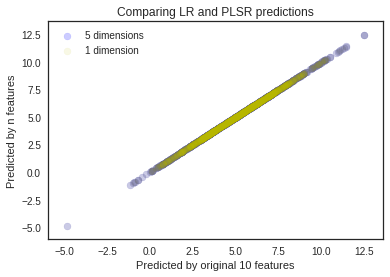

In [31]:
plt.scatter(Y_pred,Y_pls2_pred, color = 'b', alpha = 0.2, label = '5 dimensions') 
plt.scatter(Y_pred,Y_pls2_pred, color = 'y', alpha = 0.1, label = '1 dimension') 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by n features')
plt.title('Comparing LR and PLSR predictions')
plt.legend()
plt.show()

In [0]:
# Number of datapoints in outcome.
n = 1000

# Number of features.
p = 10

# Create random normally distributed data for parameters.
X = np.random.normal(size=n * p).reshape((n, p))

# Create normally distributed outcome related to parameters but with more noise.
y2 = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 20

R-squared regression: 0.8323389706343133
R-squared PLSR where n=3: 0.8323388421765674
R-squared PLSR, where n=1: 0.825493364908538
R-squared PLSR, where n=5: 0.8323389706308104


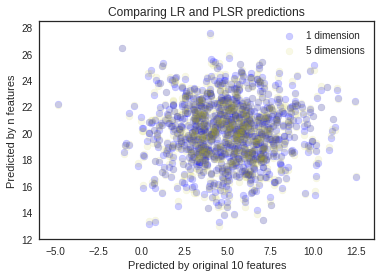

In [33]:
regr.fit(X, y2)

# Save predicted values.
Y2_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y2))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls4 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls4.fit(X, y2)

# Save predicted values.
Y2_pls4_pred = pls4.predict(X)
print('R-squared PLSR where n=3:', pls4.score(X, y2))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 1 dimensions.
pls5 = PLSRegression(n_components=1)

# Reduce X to R(X) and regress on y.
pls5.fit(X, y2)

# Save predicted values.
Y2_pls5_pred = pls5.predict(X)
print('R-squared PLSR, where n=1:', pls5.score(X, y2))

# Fit a linear model using Partial Least Squares Regression.
# Increase feature space to 5 dimensions.
pls6 = PLSRegression(n_components=5)

# Reduce X to R(X) and regress on y.
pls6.fit(X, y2)

# Save predicted values.
Y2_pls6_pred = pls6.predict(X)
print('R-squared PLSR, where n=5:', pls6.score(X, y2))


# Compare the predictions of the two models
plt.scatter(Y_pred,Y2_pls5_pred, color = 'b', alpha = 0.2, label = '1 dimension')
plt.scatter(Y_pred,Y2_pls6_pred,  color = 'y', alpha = 0.1, label = '5 dimensions') 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by n features')
plt.title('Comparing LR and PLSR predictions')
plt.legend()
plt.show()